#### Bike 데이터 셋을 활용한 데이터 처리 및 시각화

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("bike/test.csv", parse_dates=['datetime'])

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


#### (실습1) 데이터를 알아가기 위한 여러가지 질문을 작성해 보자.

##### 01. 데이터 날짜는 언제부터 언제까지 데이터일까?

In [7]:
train.datetime.describe()

<ipython-input-7-120836598240>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.datetime.describe()


count                   10886
unique                  10886
top       2011-06-09 04:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

##### 02. 실제 빌린 대수(count)와 다른 정보간의 관계는 어떤 관계가 있을까?
* count와 temp의 관계

In [8]:
import matplotlib.pyplot as plt
import matplotlib

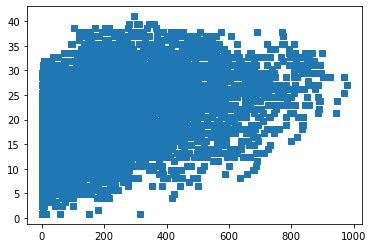

In [10]:
plt.plot(train['count'], train['temp'], 's')

##### 03. count와 다른 변수간의 관계 확인 - corr() 상관계수
* 가장 높은 상관관계를 갖는 순서로 정렬시켜보자.(pandas)
* 이를 수평 막대 그래프로 표시해 보자.
     * x축, y축 레이블, 제목을 표시해보자

In [11]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [12]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<BarContainer object of 11 artists>

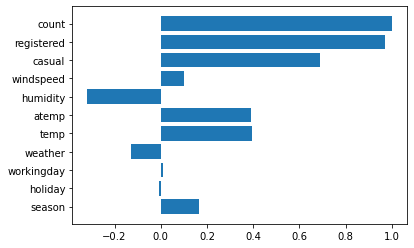

In [15]:
data = train.corr()['count']
plt.barh(data.index, data.values)

<BarContainer object of 11 artists>

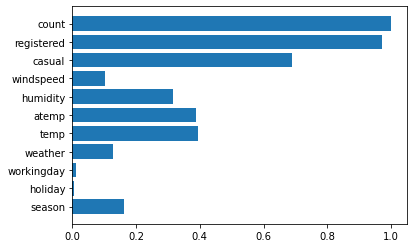

In [16]:
data = train.corr()['count'].abs() #절대값처리
plt.barh(data.index, data.values)

<BarContainer object of 11 artists>

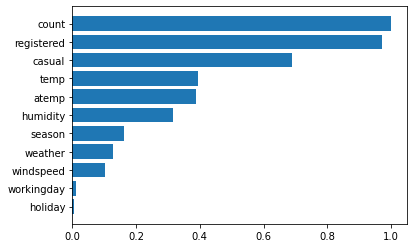

In [17]:
data = train.corr()['count'].abs().sort_values(ascending=True)
                            #절대값처리-오름차순
plt.barh(data.index, data.values)

Text(0, 0.5, 'features')

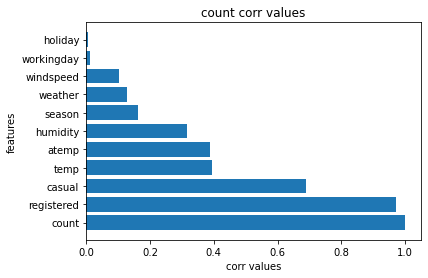

In [19]:
data = train.corr()['count'].abs().sort_values(ascending=False)
                            #절대값처리-내림차순
plt.barh(data.index, data.values)
plt.title("count corr values")
plt.xlabel("corr values")
plt.ylabel("features")

##### 04. 계절별 데이터는 어떤 패턴을 가질까?
* season 특징(정보) 확인해 보기
* 계절별 데이터를 확인 및 시각화 해 보자.
* x축을 1,2,3,4만 표시되도록 하자.

In [20]:
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

<BarContainer object of 4 artists>

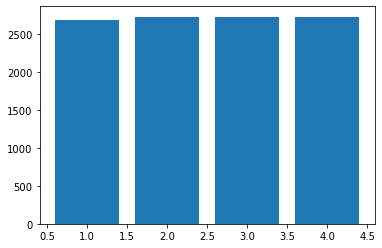

In [21]:
data = train['season'].value_counts()
plt.bar(data.index, data.values)

<BarContainer object of 4 artists>

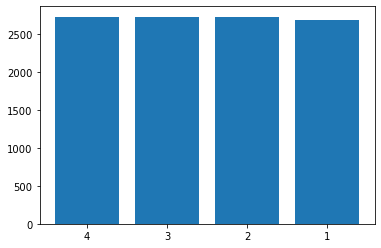

In [22]:
plt.bar(data.index.astype(str), data.values)

##### 05. 쉬는날과 쉬는 날이 아닌 데이터는 어떤 패턴을 가질까?
* holiday의 값의 종류와 count를 확인해 보기

In [23]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<BarContainer object of 2 artists>

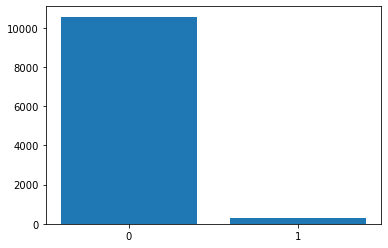

In [24]:
data = train['holiday'].value_counts()
plt.bar(data.index.astype(str), data.values)

##### 06. weather는 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?
* weather의 값의 종류와 count를 확인해 보기

In [25]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<BarContainer object of 4 artists>

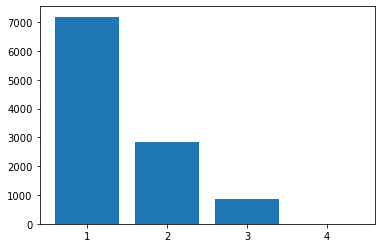

In [26]:
data = train['weather'].value_counts()
plt.bar(data.index.astype(str), data.values)

##### 06. 아래의 값의 분포를 2행, 2열로 표시해 보자.
* temp의 값의 분포는 어떠할까?
* atemp의 값의 분포는 어떠할까?
* humidity의 값의 분포는 어떠할까?
* windspeed의 값의 분포는 어떠할까?
* 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
* 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)
* 시각화 해보기(matplotlib 활용)

(array([  69.,  648., 1440., 1891., 1587., 1753., 1901., 1194.,  355.,
          48.]),
 array([ 0.82 ,  4.838,  8.856, 12.874, 16.892, 20.91 , 24.928, 28.946,
        32.964, 36.982, 41.   ]),
 <BarContainer object of 10 artists>)

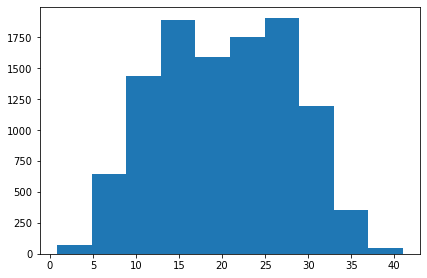

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)

(array([  44.,  406., 1243., 1679., 1790., 1962., 1832., 1425.,  440.,
          65.]),
 array([ 0.76  ,  5.2295,  9.699 , 14.1685, 18.638 , 23.1075, 27.577 ,
        32.0465, 36.516 , 40.9855, 45.455 ]),
 <BarContainer object of 10 artists>)

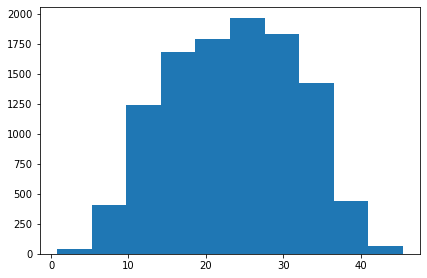

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(train.atemp)

(array([  23.,   45.,  364., 1039., 1727., 1842., 1748., 1736., 1676.,
         686.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

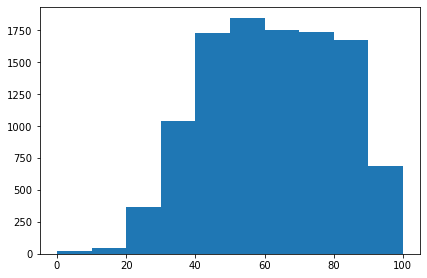

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
plt.hist(train.humidity)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

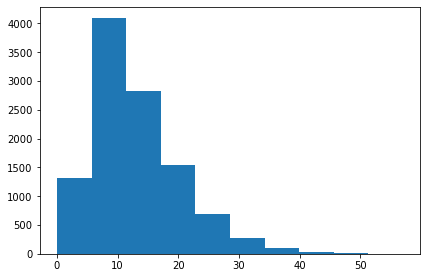

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
plt.hist(train.windspeed)

Text(0.5, 0.98, 'feature')

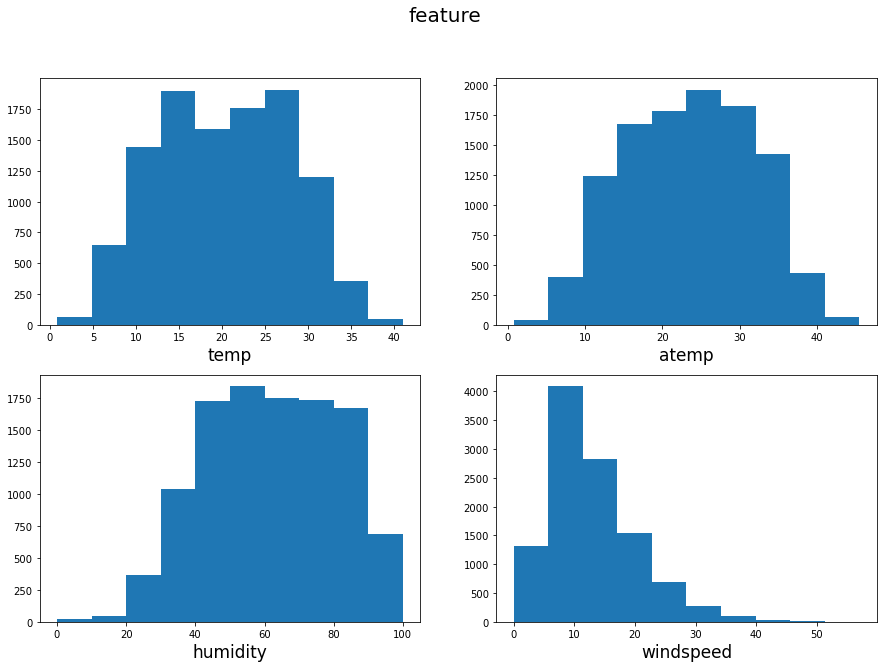

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)
plt.xlabel("temp", size=17)

plt.subplot(2,2,2)
plt.hist(train.atemp)
plt.xlabel("atemp", size=17)

plt.subplot(2,2,3)
plt.hist(train.humidity)
plt.xlabel("humidity", size=17)

plt.subplot(2,2,4)
plt.hist(train.windspeed)
plt.xlabel("windspeed", size=17)

plt.suptitle("feature", size=20)

##### 07. 여러 특징(피처)의 값들의 분포는 어떠할까?
* temp의 값의 분포는 어떠할까?
* atemp의 값의 분포는 어떠할까?
* humidity의 값의 분포는 어떠할까?
* windspeed의 값의 분포는 어떠할까?
* 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
* 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)